<a href="https://colab.research.google.com/github/Himnshu-Shrma/Face-Mask-Detection/blob/main/faceMaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
#Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

IMPORTING FACE MASK DATASET

In [3]:
#API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 161M/163M [00:09<00:00, 20.5MB/s]
100% 163M/163M [00:09<00:00, 17.5MB/s]


In [4]:
#Now we need to extract the zip folder downloaded in last line
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The Dataset has been extracted successfully')

The Dataset has been extracted successfully


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing Basic Dependencies( **Libraries** )


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image #Another image processing library
# TO split train and test data
from sklearn.model_selection import train_test_split


Analyzing the masked and unmasked images

In [7]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1685.jpg', 'with_mask_1267.jpg', 'with_mask_2474.jpg', 'with_mask_2007.jpg', 'with_mask_3233.jpg']
['with_mask_1275.jpg', 'with_mask_3257.jpg', 'with_mask_495.jpg', 'with_mask_1014.jpg', 'with_mask_2331.jpg']


In [8]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_76.jpg', 'without_mask_829.jpg', 'without_mask_1647.jpg', 'without_mask_3491.jpg', 'without_mask_3213.jpg']
['without_mask_2569.jpg', 'without_mask_3360.jpg', 'without_mask_3411.jpg', 'without_mask_1310.jpg', 'without_mask_1787.jpg']


In [9]:
print('Number of with mask images',len(with_mask_files))
print('Number of without mask images',len(without_mask_files))

Number of with mask images 3725
Number of without mask images 3828


Creating lables for these two class of images
with mask-->1
without mask ->0

In [10]:
#here it will be little easy because they have somme with/without lables

with_mask_lables=[1]*len(with_mask_files)

without_mask_lables=[0]*len(without_mask_files)

In [11]:
print(with_mask_lables[0:5])
print(without_mask_lables[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(without_mask_lables))
print(len(without_mask_lables))

3828
3828


In [13]:
#Merging these two lables by adding both arrays
lables=with_mask_lables+without_mask_lables

print(len(lables))
print(lables[0:5])
print(lables[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying images to check resolution

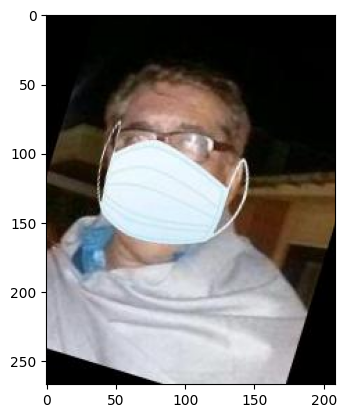

In [ ]:
#displaying with mask image

img=mpimg.imread('/content/data/with_mask/with_mask_1856.jpg')
imgplt = plt.imshow(img)
plt.show()

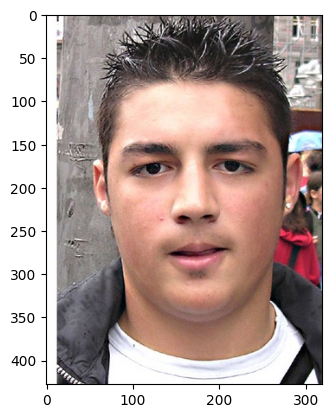

In [ ]:
#displaying without mask image

img=mpimg.imread('/content/data/without_mask/without_mask_3560.jpg')
imgplt = plt.imshow(img)
plt.show()

**Image Processing**

1.   Resize the image
2.   Converting images to numnpy arrays



In [14]:
#convert the arrays to numpy arrays

with_mask_path='/content/data/with_mask/'

data=[]#empty list

for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)#Opening each img in with mask folder
  image=image.resize((128,128))
  image=image.convert('RGB')#for black and whote images
  image=np.array(image)
  data.append(image)#adding each img to data


without_mask_path='/content/data/without_mask/'

for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)#Opening each img in with mask folder
  image=image.resize((128,128))
  image=image.convert('RGB')#for black and whote images
  image=np.array(image)
  data.append(image)#adding each img to data

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
#Analyzing this data
print(type(data))
len(data)
data[0]
type(data[0])
data[0].shape#third one is color channel

<class 'list'>


(128, 128, 3)

In [16]:
#converting iamge list and lable list into numpy arrays

X=np.array(data)
Y=np.array(lables)
type(X)
type(Y)
print(X.shape)#(number of numpy array,height,width of each array,color channel(no. of numpy))
print(Y.shape)#(number of numpy array,)

(7553, 128, 128, 3)
(7553,)


Spliting into train and test data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [18]:
#scaling the data(normalizing it by diving each value by 255,getting all value in range 0-1)


X_train_scaled=X_train/255
X_test_scaled=X_test/255

print(X_train[0])

[[[ 33  42  41]
  [ 32  41  39]
  [ 34  39  38]
  ...
  [ 22  23  25]
  [ 20  21  23]
  [ 20  21  24]]

 [[ 33  41  39]
  [ 37  43  41]
  [ 41  44  43]
  ...
  [ 24  25  27]
  [ 24  25  27]
  [ 21  24  24]]

 [[ 40  43  42]
  [ 45  46  44]
  [ 47  48  46]
  ...
  [ 26  30  27]
  [ 25  29  26]
  [ 25  30  27]]

 ...

 [[ 11  11  11]
  [ 10  10  10]
  [ 10  10  10]
  ...
  [ 98  74  58]
  [ 97  74  60]
  [ 96  72  60]]

 [[ 11  11  11]
  [ 10  10  10]
  [ 10  10  10]
  ...
  [102  76  62]
  [100  76  62]
  [ 99  75  63]]

 [[ 12  12  12]
  [ 10  10  10]
  [ 10  10  10]
  ...
  [106  80  67]
  [104  77  64]
  [101  77  65]]]


In [ ]:
print(X_train_scaled[0])

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[0.92941176 0.90196078 0.87058824]
  [0.9254902  0.89803922 0.86666667]
  [0.9254902  0.89803922 0.86666667]
  ...
  [0.82745098 0.80784314 0.76078431]
  [0.80784314 0.78823529 0.74117647]
  [0.82352941 0.81960784 0.78431373]]

 [[0.93333333 0.90588235 0.8745098 ]
  [0.93333333 0.90588235 0.8745098 ]


**Building a Convolutional Neural Networks**

In [19]:
#importing some other library
import tensorflow as tf
from tensorflow import keras

num_of_classes=2

model=keras.Sequential()

#adding layers
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())#converting into one dimension

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))


In [20]:
#compile the neural netwrok
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])


In [21]:
#training the neural network
history= model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 [==============================] - 15s 23ms/step - loss: 0.4804 - acc: 0.8006 - val_loss: 0.3280 - val_acc: 0.8612
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2920 - acc: 0.8828 - val_loss: 0.2782 - val_acc: 0.8992
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2454 - acc: 0.9062 - val_loss: 0.2427 - val_acc: 0.9157
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1998 - acc: 0.9167 - val_loss: 0.1854 - val_acc: 0.9223
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1691 - acc: 0.9356 - val_loss: 0.3240 - val_acc: 0.9091


**MOdel Evaluation**

In [22]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy =',accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.3546 - acc: 0.9027
Test Accuracy = 0.902713418006897


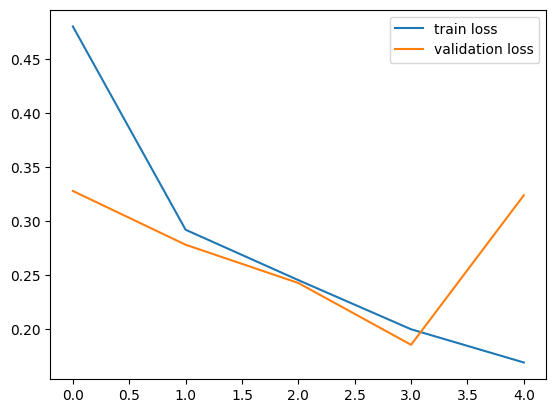

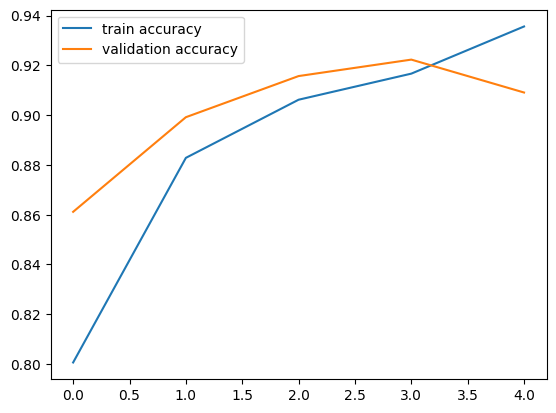

In [26]:
h=history

#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

#plot the accuracy
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/pexels-photo-6998744.webp


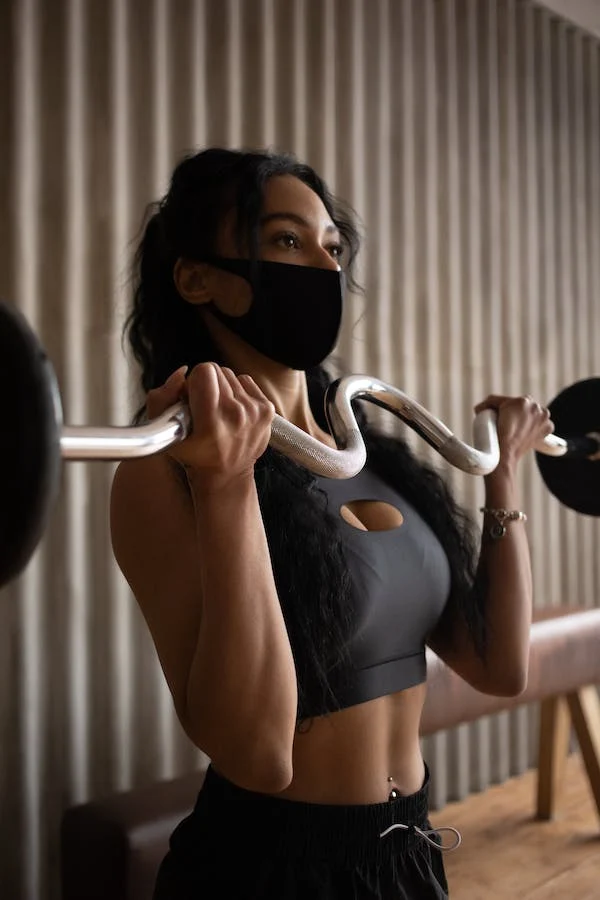

1/1 [==============================] - 0s 33ms/step
[[0.05036002 0.9966108 ]]
1
The person in the iamge is wearing a mask


In [31]:
input_image_path=input('Path of the image to be predicted: ')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized=cv2.resize(input_image,(128,128))

input_image_scaled=input_image_resized/255

input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])

input_prediction=model.predict(input_image_reshaped)

print(input_prediction)

input_pred_lable=np.argmax(input_prediction)

print(input_pred_lable)

if input_pred_lable==1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')